In [17]:
## Model Training

### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
!pip install xgboost


In [19]:
# Modeling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor


In [20]:
### Import the CSV Data as Pandas DataFrame
df = pd.read_csv("D:\projects\mlprojects\src\stud.csv")

### Show Top 5 Records
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [31]:
### Preparing X and Y variables
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']
X.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [32]:
# Show unique values for each categorical column
print("Categories in 'gender':", df['gender'].unique())
print("Categories in 'race_ethnicity':", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education':", df['parental_level_of_education'].unique())
print("Categories in 'lunch':", df['lunch'].unique())
print("Categories in 'test_preparation_course':", df['test_preparation_course'].unique())

Categories in 'gender': ['female' 'male']
Categories in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': ['standard' 'free/reduced']
Categories in 'test_preparation_course': ['none' 'completed']


In [36]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [37]:

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
### Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [38]:
# Transform the features
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [40]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create an Evaluate Function to give all metrics after model training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [41]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Train and Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"{name}")
    print("Model performance for Training set:")
    print(f"- RMSE: {train_rmse:.4f}")
    print(f"- MAE: {train_mae:.4f}")
    print(f"- R2 Score: {train_r2:.4f}")
    print("----------------------------------")
    print("Model performance for Test set:")
    print(f"- RMSE: {test_rmse:.4f}")
    print(f"- MAE: {test_mae:.4f}")
    print(f"- R2 Score: {test_r2:.4f}")
    print("="*35 + "\n")

    model_list.append(name)
    r2_list.append(test_r2)

### Results: Compare all models
results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
print(results_df.sort_values(by="R2_Score", ascending=False))

## Linear Regression (Final Model Visualization)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

score = r2_score(y_test, y_pred) * 100
print("Accuracy of Linear Regression model: %.2f%%" % score)

Linear Regression
Model performance for Training set:
- RMSE: 5.3231
- MAE: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set:
- RMSE: 5.3940
- MAE: 4.2148
- R2 Score: 0.8804

Lasso
Model performance for Training set:
- RMSE: 6.5938
- MAE: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set:
- RMSE: 6.5197
- MAE: 5.1579
- R2 Score: 0.8253

Ridge
Model performance for Training set:
- RMSE: 5.3233
- MAE: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set:
- RMSE: 5.3904
- MAE: 4.2111
- R2 Score: 0.8806

K-Neighbors Regressor
Model performance for Training set:
- RMSE: 5.7077
- MAE: 4.5167
- R2 Score: 0.8555
----------------------------------
Model performance for Test set:
- RMSE: 7.2530
- MAE: 5.6210
- R2 Score: 0.7838

Decision Tree
Model performance for Training set:
- RMSE: 0.2795
- MAE: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performan

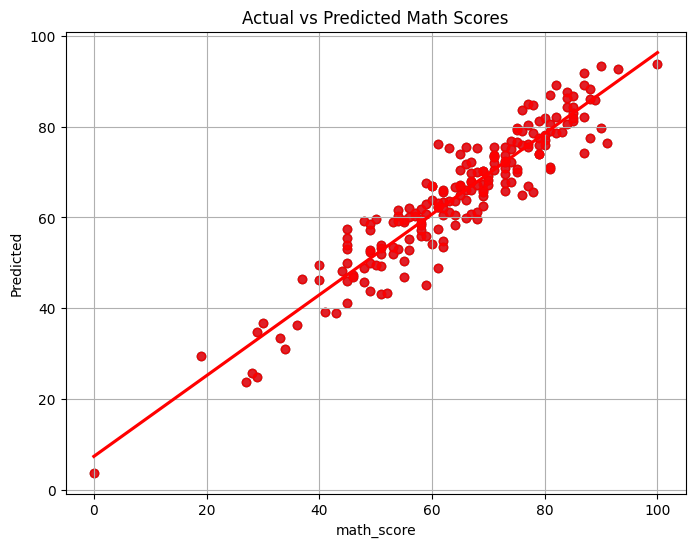

In [43]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='black', alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Math Scores')
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.grid(True)
plt.show()

In [42]:
# Difference between Actual and Predicted Values
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})
print(pred_df.head())

     Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378


In [44]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852830
6,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.847653
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.725218
